In [87]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Synthetic Data

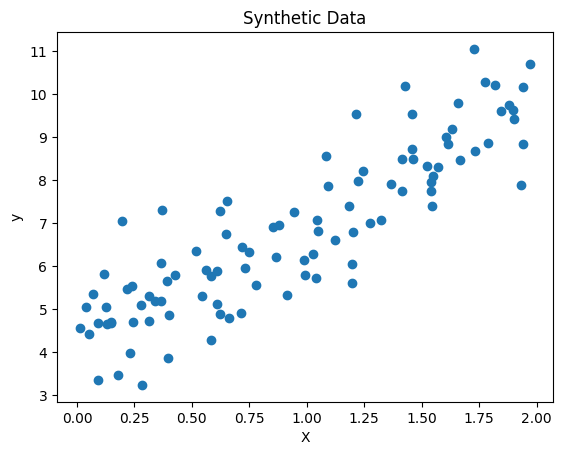

In [88]:

import numpy as np
import matplotlib.pyplot as plt

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Plot
plt.scatter(X, y)
plt.xlabel("X")
plt.ylabel("y")
plt.title("Synthetic Data")
plt.show()


#Do Train-Test Split (75%-25%)

In [89]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.25, random_state=42)

#Do the Linear Regression with Scikit-Learn Library

In [90]:
from sklearn.linear_model import LinearRegression
reg_lin=LinearRegression()
reg_lin.fit(X_train,y_train)
y_pred=reg_lin.predict(X_test)

In [91]:
from sklearn.metrics import r2_score,mean_absolute_percentage_error
mape=mean_absolute_percentage_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("Mean Absolute Percentage Error:",mape)
print("R-squared:", r2)

Mean Absolute Percentage Error: 0.08475682819153892
R-squared: 0.8310990846073661


#Do Ridge and Lasso Regression and Compare the evaluation metrics in a table

In [92]:
#Ridge:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)
mape_ridge = mean_absolute_percentage_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

In [93]:
#Lasso:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)
mape_lasso = mean_absolute_percentage_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

In [94]:
#Compared, evaluation metrics in a table:
result_df= pd.DataFrame(columns=["Model","Metric","Value"])
result_df.loc[len(result_df)] = ['Ridge Regression',"MAPE",mape_ridge]
result_df.loc[len(result_df)] = ['Lasso Regression',"MAPE",mape_lasso]
result_df.loc[len(result_df)] = ['Ridge Regression',"R2",r2_ridge]
result_df.loc[len(result_df)] = ['Lasso Regression',"R2",r2_lasso]
result_df

,Model,Metric,Value
0,Ridge Regression,MAPE,0.082412
1,Lasso Regression,MAPE,0.082640
2,Ridge Regression,R2,0.825999
3,Lasso Regression,R2,0.809082


#Derive the Gradient Updates

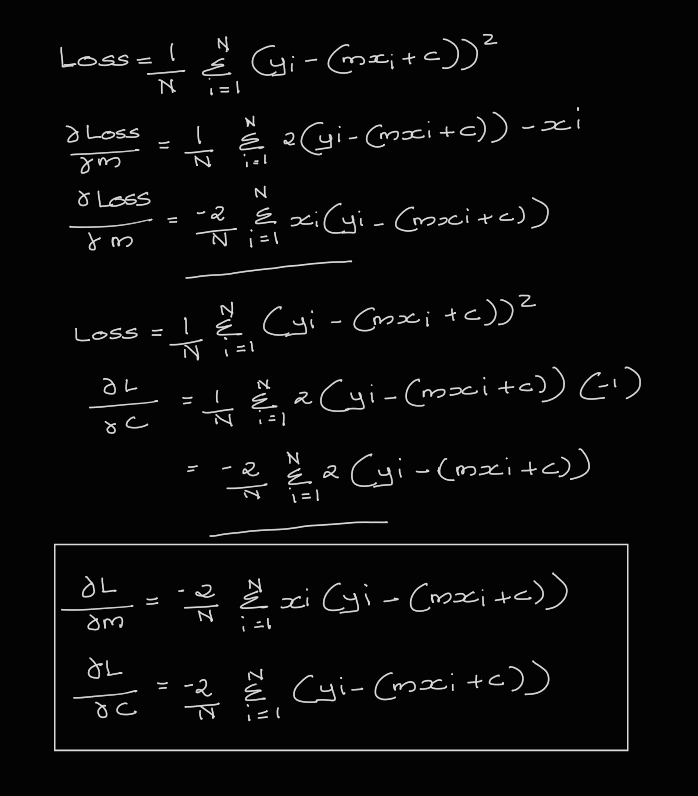

#Custom Linear Regression Class

In [95]:
import numpy as np

class MyLinearRegression:
    def __init__(self):
        self.m = 0  # slope
        self.c = 0  # intercept
        self.coef_ = (self.m, self.c)
        self.losses_ = []

    def fit(self, X, y, lr=0.01, n_iters=1000):
        N = len(X)
        self.m = 0
        self.c = 0
        self.losses_ = []  # Reset losses

        for _ in range(n_iters):
            y_pred = self.m * X + self.c
            loss = np.mean((y - y_pred) ** 2)
            self.losses_.append(loss)

            dm = (-2 / N) * np.sum(X * (y - y_pred))
            dc = (-2 / N) * np.sum(y - y_pred)
            self.m -= lr * dm
            self.c -= lr * dc

        self.coef_ = (self.m, self.c)

    def predict(self, X):
        return self.m * X + self.c

    def fit_transform(self, X, y, lr=0.01, n_iters=1000):
        self.fit(X, y, lr, n_iters)
        return self.predict(X)


#Train the Model and Visualize the Fit

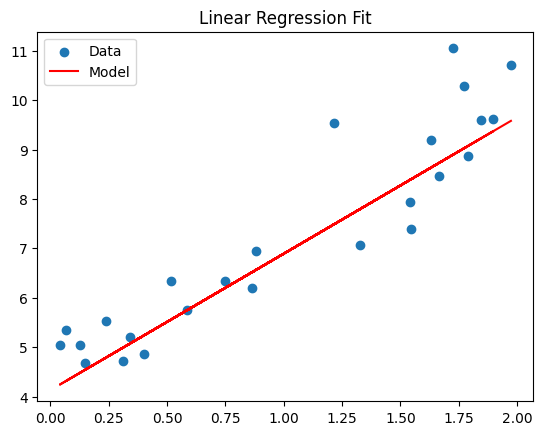

Learned coefficients (m, c): (np.float64(2.760287211333097), np.float64(4.131338540026423))


In [102]:
model = MyLinearRegression()
model.fit(X_train, y_train, lr=0.1, n_iters=100)

# Predictions
y_pred_c = model.predict(X_test)

# Plot
plt.scatter(X_test, y_test, label="Data")
plt.plot(X_test, y_pred_c, color="red", label="Model")
plt.legend()
plt.title("Linear Regression Fit")
plt.show()

# Print coefficients
print("Learned coefficients (m, c):", model.coef_)


#Loss Curve

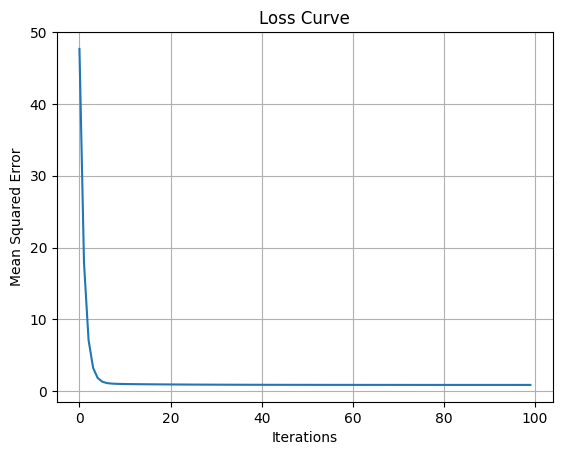

In [103]:
import matplotlib.pyplot as plt

# Train model
model = MyLinearRegression()
model.fit(X_train, y_train, lr=0.1, n_iters=100)

# Plot loss curve
plt.plot(model.losses_)
plt.xlabel("Iterations")
plt.ylabel("Mean Squared Error")
plt.title("Loss Curve")
plt.grid(True)
plt.show()


#Bonus Task: Stochastic Gradient Descent

In [104]:
import numpy as np

class MyLinearRegressionSGD:
    def __init__(self):
        self.m = 0  # slope
        self.c = 0  # intercept
        self.coef_ = (self.m, self.c)
        self.losses_ = []

    def fit(self, X, y, lr=0.01, n_epochs=100):
        N = len(X)
        self.m = 0
        self.c = 0
        self.losses_ = []

        for epoch in range(n_epochs):
            # Shuffle data
            indices = np.random.permutation(N)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            epoch_loss = 0

            for i in range(N):
                xi = X_shuffled[i]
                yi = y_shuffled[i]
                y_pred = self.m * xi + self.c

                # Gradients for one sample
                error = yi - y_pred
                dm = -2 * xi * error
                dc = -2 * error

                # Update weights
                self.m -= lr * dm
                self.c -= lr * dc

                # Accumulate loss
                epoch_loss += error ** 2

            # Average loss for the epoch
            self.losses_.append(epoch_loss / N)

        self.coef_ = (self.m, self.c)

    def predict(self, X):
        return self.m * X + self.c


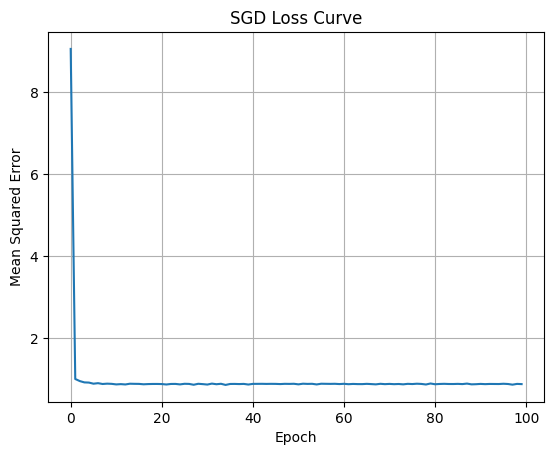

SGD Learned coefficients (m, c): (array([2.7137736]), array([4.12454844]))


In [105]:
model_sgd = MyLinearRegressionSGD()
model_sgd.fit(X_train, y_train, lr=0.01, n_epochs=100)

# Predict
y_pred_sgd = model_sgd.predict(X_test)

# Plot loss curve
plt.plot(model_sgd.losses_)
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.title("SGD Loss Curve")
plt.grid(True)
plt.show()

# Coefficients
print("SGD Learned coefficients (m, c):", model_sgd.coef_)


#Visualize the prediction result of Library version and Custom regression code created

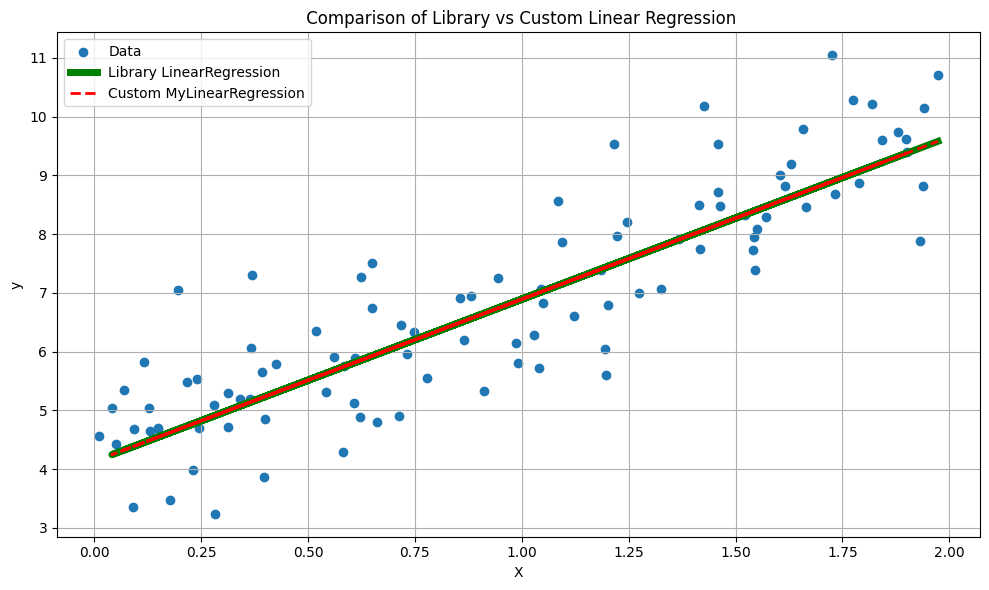

In [115]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, label="Data", alpha=1)
plt.plot(X_test,y_pred , color="green", label="Library LinearRegression", linewidth=5)
plt.plot(X_test,y_pred_c, color="red", linestyle="--", label="Custom MyLinearRegression", linewidth=2)
plt.title(" Comparison of Library vs Custom Linear Regression")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#Loss Curve comparison

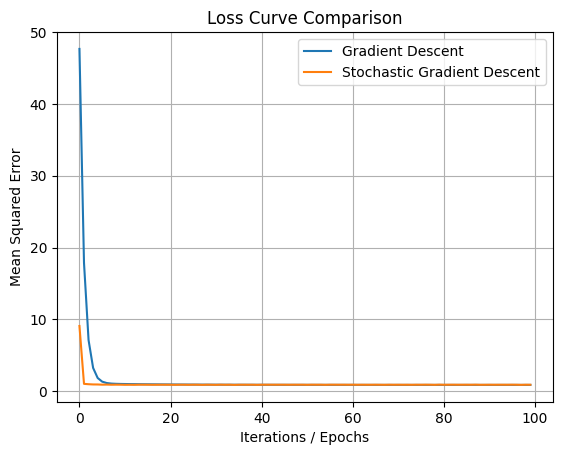

In [119]:
plt.plot(model.losses_, label="Gradient Descent")
plt.plot(model_sgd.losses_, label="Stochastic Gradient Descent")
plt.xlabel("Iterations / Epochs")
plt.ylabel("Mean Squared Error")
plt.title("Loss Curve Comparison")
plt.legend()
plt.grid(True)
plt.show()